<center><h1 class="background-title"> $\text{Machine Learning in Healthcare (097248)}$ </h1>

<h3> $\text{Wisconsin Breast Cancer Dataset}$ </h3>
<h6> $\text{By : Daniel Engelsman}$ </h6></center>

## $\text{Introduction}$

The following interactive notebook utilizes as an execution platform of my project on the "[Wisconsin Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))". \
Today's breast cancer screening can be either X-ray or CT scans, providing a high dimensional raw data that is rich in features :

<center><img src= https://upload.wikimedia.org/wikipedia/commons/8/81/Pulmon_fibrosis.PNG  width="600px" style="width:500px"/></center>

This kind of data is an easy prey for Deep Neural Networks (DNN) for their inherent ability to find lower dimensional\
 representations and learn to efficiently distinguish between them. However here, the dataset was released long\
  ago $( \, 15 / 07 / 1992 \, )$ at significantly lower resolution,
 consists of a digitized image of a fine needle aspirate ([FNA](https://en.wikipedia.org/wiki/Fine-needle_aspiration)) :
<!-- back in the days when web traffic was not even a term : -->
 <center><img src="https://github.com/Daniboy370/Machine-Learning/blob/master/Misc/Latex/Images/Benign_Malignant.png?raw=true" width="800px" style="width:500px"/></center>

In the absence of any advanced computational equipment, scientists were focused more on extraction of meaningful\
 insights in attempt to distinguish between the samples :

<center><img src="https://github.com/Daniboy370/Machine-Learning/blob/master/Misc/Latex/Images/diagnosis.png?raw=true" width="800px" style="width:500px"/></center>

Interestingly, several subtle differences were found, and thereby encouraged the research groups to further understand\
 what are the dominant key points that affect the decision rule.

<!-- However, in this work I aim to challenge the ANN approach by performing a comprehensive research around the data, and then explore different classification models, using classic ML tools only. -->

#### $\text{Intention Statement }$

> In this project I would like to analyze and explore the data thoroughly, in search of hidden patterns using\
 merely unsupervised classification methods, that are not deep learning.
 

#### $\text{The workflow}$

<center><img src="https://github.com/Daniboy370/Machine-Learning/blob/master/Misc/Latex/Images/pipeline.png?raw=true" width="800px" style="width:800px" /></center>

## $\text{Exploratory Data Analysis (EDA)}$

In this section the dataset will be analyzed to come up with the main characteristics that could shed light\
 on the nature of the data. The analysis will assist to find out which features are more crucial in predicting\
  whether a sample is cancerous or not. 

$\bullet \ $ **NOTE :** Along the notebook the code is hidden for aesthetic reasons (*double click to open*).

In [1]:
#@title

# ------------- General libraries -------------- #
import os
import numpy as np  
import pandas as pd 
from math import pi
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import widgets

# ------------- sklearn : ML tools ------------- #
from sklearn import svm
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder #, label_binarize, LabelBinarizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV, RFE
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 90  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Loading the data
url = 'https://raw.githubusercontent.com/Daniboy370/Machine-Learning/master/Misc/Breast%20Cancer%20Wisconsin%20Dataset.csv'
df = pd.read_csv(url)
rndperm = np.random.permutation(df.shape[0])
D = df.iloc[rndperm, :]

## Print the number of rows in the data set
df_rows, df_cols = df.shape
print('Table size : {} x {}'.format(df_rows, df_cols) )

ix_mn, ix_se, ix_wt = [*range(0, 10, 1)], [*range(10, 20, 1)], [*range(20, 30, 1)]

def arr_shift(arr, shift):
    return [i+shift for i in arr]

class_feat = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave points', 'Symmetry', 'Fractal dim.']
X_class = pd.DataFrame(class_feat, columns = ['Class'])
null_df1 = pd.DataFrame(df.iloc[:, arr_shift(ix_mn, 1)].isnull().sum(), columns = ['NaN'])
null_df2 = pd.DataFrame(df.iloc[:, arr_shift(ix_se, 1)].isnull().sum(), columns = ['NaN'])
null_df3 = pd.DataFrame(df.iloc[:, arr_shift(ix_wt, 1)].isnull().sum(), columns = ['NaN'])

le = LabelEncoder()                 # label encoding
X, y = D.iloc[:, 2:], D[['diagnosis']]
y = y.rename(columns={'diagnosis': 'Diagnosis'})
y['Diagnosis'] = le.fit_transform( y['Diagnosis'] )

df_NaN = X_class
df_NaN['Mean'], df_NaN['SE'], df_NaN['Worst'] = null_df1.to_numpy(), null_df2.to_numpy(), null_df3.to_numpy()

# ---- Missing Values Warning ---- #
if (df_NaN.iloc[:, 1:4].sum() != 0).any():
    print('Warning ! deteced missing values !')


# ----------------------------------------------------- #
# ----------- Import from Drive environment ----------- #
# from google.colab import drive
# PATH_mount = '/content/gdrive'
# drive.mount(PATH_mount)

# # ------- Change to working directory ------- #
# PATH_dir = '/My Drive/Colab Notebooks/Proj-ML'
# os.chdir(PATH_mount + PATH_dir)

# url = 'https://github.com/Daniboy370/Machine-Learning/blob/master/Machine-Learning-Project/wdbc.csv'
# df = pd.read_csv('Wisconsin Breast Cancer Dataset.csv')
# ----------------------------------------------------- #

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Table size : 569 x 32


First of all, the data integrity should be checked for NaN or missing values :

In [2]:
df_NaN

,Class,Mean,SE,Worst
0,Radius,0,0,0
1,Texture,0,0,0
2,Perimeter,0,0,0
3,Area,0,0,0
4,Smoothness,0,0,0
5,Compactness,0,0,0
6,Concavity,0,0,0
7,Concave points,0,0,0
8,Symmetry,0,0,0
9,Fractal dim.,0,0,0


After found valid, that dataset is shuffled randomly :
<!-- Consider ten random rows of the raw-data : -->

In [3]:
D.head(10)        # Show ten first samples (after random shuffling)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
166,87127,B,10.800,9.71,68.77,357.6,0.09594,0.05736,0.025310,0.016980,0.1381,0.06400,0.1728,0.4064,1.126,11.480,0.007809,0.009816,0.010990,0.005344,0.01254,0.002120,11.600,12.02,73.66,414.0,0.1436,0.12570,0.10470,0.04603,0.2090,0.07699
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.217,27.190,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.470,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.015880,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.1297,0.13570,0.06880,0.02564,0.3105,0.07409
332,897132,B,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,0.2976,1.9660,1.959,19.620,0.012890,0.011040,0.003297,0.004967,0.04243,0.001963,11.980,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
563,926125,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.317400,0.147400,0.2149,0.06879,0.9622,1.0260,8.758,118.800,0.006399,0.043100,0.078450,0.026240,0.02057,0.006213,24.290,29.41,179.10,1819.0,0.1407,0.41860,0.65990,0.25420,0.2929,0.09873
201,877989,M,17.540,19.32,115.10,951.6,0.08968,0.11980,0.103600,0.074880,0.1506,0.05491,0.3971,0.8282,3.088,40.730,0.006090,0.025690,0.027130,0.013450,0.01594,0.002658,20.420,25.84,139.50,1239.0,0.1381,0.34200,0.35080,0.19390,0.2928,0.07867
420,906539,B,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,0.06267,0.2864,1.4400,2.206,20.300,0.007278,0.020470,0.044470,0.008799,0.01868,0.003339,13.070,26.98,86.43,520.5,0.1249,0.19370,0.25600,0.06664,0.3035,0.08284
257,886776,M,15.320,17.27,103.20,713.3,0.13350,0.22840,0.244800,0.124200,0.2398,0.07596,0.6592,1.0590,4.061,59.460,0.010150,0.045880,0.049830,0.021270,0.01884,0.008660,17.730,22.66,119.80,928.8,0.1765,0.45030,0.44290,0.22290,0.3258,0.11910
173,871641,B,11.080,14.71,70.21,372.7,0.10060,0.05743,0.023630,0.025830,0.1566,0.06669,0.2073,1.8050,1.377,19.080,0.014960,0.021210,0.014530,0.015830,0.03082,0.004785,11.350,16.82,72.01,396.5,0.1216,0.08240,0.03938,0.04306,0.1902,0.07313
324,89511501,B,12.200,15.21,78.01,457.9,0.08673,0.06545,0.019940,0.016920,0.1638,0.06129,0.2575,0.8073,1.959,19.010,0.005403,0.014180,0.010510,0.005142,0.01333,0.002065,13.750,21.38,91.11,583.1,0.1256,0.19280,0.11670,0.05556,0.2661,0.07961


$\hspace{6cm} \ \underline{\text{Data specification}}$ 

${\text{Number of samples }} : n = 569  \hspace{3.3cm} {\text{Full dataset}} : \ D = \{ X, Y \} = \{ x_i, y_i \}_{i=1}^{n}$

$ \text{Input space : }  \dim(X) = ( \underset{\text{case :}}{n \times 10}) \times \underset{\text{a, b, c}}{3} \hspace{1cm} \text{Output space : }\dim(Y) = n $ 

$\underline{\text{Dependent variable / Target}} \ \big( \hspace{2mm} y_i = \{B, \, M  \} \hspace{2mm} \big)$ \\
* **Diagnosis** - Binary indication whether a sample is Benign $(0)$ or Malignant $(1)$.

Feature space $X$ consists of three different analysis cases (same features) : 

**a** $:=$ Mean $(\mu) =  X_{[:, \, 1:10]} \hspace{1cm}$ 
**b** $:=$ SE $(\frac{\sigma}{\sqrt{n}})  = X_{[:, \, 11:20]} \hspace{1cm}$
**c** $:=$ Worst (3 max-values) $ = X_{[:, \, 21:30]}$

For example, let us examine the $i$-th sample from the mean case (**a**) :

$\underline{\text{Independent variable / Feature}} \,\ \big( \hspace{2mm} x_i \in \mathbb{R}^{10} \hspace{2mm} \big)$
* **Radius** - mean of distances from center to points on the perimeter.
* **Texture** - standard deviation of gray-scale value.
* **Perimeter** - $P = \sum_{i=1}^n l_i \hspace{39.25mm}$ (Given  $n$  vertices)
* **Area** - $\hspace{7mm} A = \frac{1}{2} \big( \sum_j w_j z_{j+1} - z_{j} w_{j+1} \big) \quad$ (Given  $n$  vertices on WZ plane)
* **Smoothness** - Local variation in radius lengths.
* **Compactness** - ($P^2$ / $A$ - 1.0)
* **Concavity** - Severity of concave portions of the contour.
* **Concave points** - Number of concave portions of the contour.
* **Symmetry** - Relative difference of two half-planes.
* **Fractal dimension** - ("coastline approximation" - 1)

To sum up, we can say that the dataset fulfills - $X = [X^{(a)}_{\text{Mean}}, \, X^{(b)}_{\text{SE}}, \, X^{(c)}_{\text{Worst}}] \in \mathbb{R}^{(n \times 10) \times 3}$ :

Feature | Mean | SE | Worst
--- | --- | --- | ---
1.Radius | $\quad \vdots$ |  $\ \vdots$ |  $\quad \vdots$
$\quad \cdots$ | $\quad \vdots$ |  $\ \vdots$ |  $\quad \vdots$
10.Fractal dim. | $\quad \vdots$ |  $\ \vdots$ |  $\quad \vdots$


### $\text{Data composition}$

The binary target variable $\big($ <font color='blue'>  **B** </font> $\ / \ $ <font color='orange'>  **M** </font> $\big)$ can act as a helpful tool to better understand the data distribution :


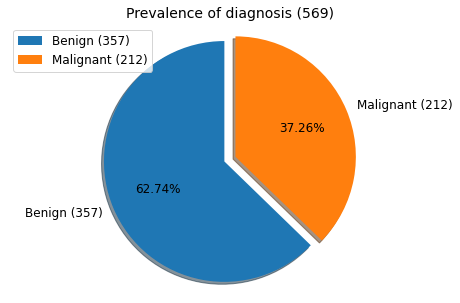

In [4]:
#@title

sum_D = len(y)
sum_M = (y.values==1).sum()
sum_B = sum_D - sum_M
frac_B = sum_B/sum_D
frac_M = 1 - frac_B
labels = 'Benign ('+str(sum_B)+')', 'Malignant ('+str(sum_M)+')'
sizes = [frac_B, frac_M]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90, textprops={'fontsize': 12})

ax1.set_title('Prevalence of diagnosis ('+str(sum_D)+')', fontsize=14)
ax1.axis('equal')
ax1.legend(fontsize=12, loc=2)
plt.show()

After applying a random training/test split ratio of  $\ 80 / 20 \ [\%]$ , the target distribution becomes :

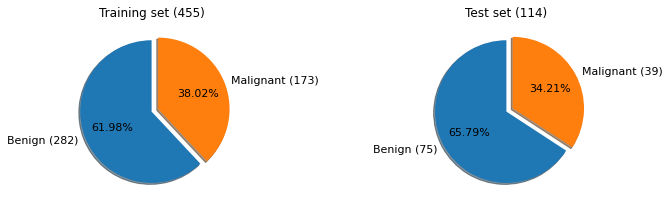

In [5]:
#@title
from sklearn.model_selection import train_test_split

# Train/Test : { 80 [%], 20 [%] }
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ix_train, ix_test = X_train.index, X_test.index

sum_tr   = len(y_train)
sum_tr_M = (y_train.values==1).sum()
sum_tr_B = sum_tr - sum_tr_M
frac_tr_B = sum_tr_B/sum_tr
frac_tr_M = 1 - frac_tr_B
sizes_tr = [frac_tr_B, frac_tr_M]
explode_tr = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
labels_tr = 'Benign ('+str(sum_tr_B)+')', 'Malignant ('+str(sum_tr_M)+')'

sum_ts   = len(y_test)
sum_ts_M = (y_test.values==1).sum()
sum_ts_B = sum_ts - sum_ts_M
frac_ts_B = sum_ts_B/sum_ts
frac_ts_M = 1 - frac_ts_B
sizes_ts = [frac_ts_B, frac_ts_M]
explode_ts = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
labels_ts = 'Benign ('+str(sum_ts_B)+')', 'Malignant ('+str(sum_ts_M)+')'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
axes[0].pie(sizes_tr, explode=explode_tr, labels=labels_tr, autopct='%1.2f%%', shadow=True, startangle=90, textprops={'fontsize': 11})
axes[0].set_title('Training set ('+str(sum_tr)+')', fontsize=12)
# axes[0].legend(fontsize=10, loc=4)

axes[1].pie(sizes_ts, explode=explode_ts, labels=labels_ts, autopct='%1.2f%%', shadow=True, startangle=90, textprops={'fontsize': 11})
axes[1].set_title('Test set ('+str(sum_ts)+')', fontsize=12)
# axes[1].legend(fontsize=10, loc=4)

plt.tight_layout()
plt.show()



Despite not being perfectly equal, the data imbalance can be said to be reasonable.Let us analyze\
the **three** different cases $\, \big( \text{a} $ = mean,$\ \text{b}$ = SE$, \text{c}$ = worst $\big)$ with respect to **four** aspects $\big( \ \mu, \sigma, \underset{x}{\min}(), \underset{x}{\max}() \ \big)$ :

In [6]:
#@title

# Logical statement for diagnosis
y_B, y_M = (y.values==0), (y.values==1)           
# Partition the dataset
D_full = D.iloc[:, 2:]
X_mn, X_se, X_wt = D_full.iloc[:, ix_mn], D_full.iloc[:, ix_se], D_full.iloc[:, ix_wt]
X_mn.columns, X_se.columns, X_wt.columns = class_feat, class_feat, class_feat

df_NaN = pd.DataFrame(class_feat, columns=['Aspcet'])
df_NaN['Mean_a'] = (X_mn.mean(axis=0)).values
df_NaN['Mean_b'] = (X_se.mean(axis=0)).values
df_NaN['Mean_c'] = (X_wt.mean(axis=0)).values

df_NaN['std_a'] = (X_mn.std(axis=0)).values
df_NaN['std_b'] = (X_se.std(axis=0)).values
df_NaN['std_c'] = (X_wt.std(axis=0)).values

df_NaN['Min_a'] = (X_mn.min(axis=0)).values
df_NaN['Min_b'] = (X_se.min(axis=0)).values
df_NaN['Min_c'] = (X_wt.min(axis=0)).values

df_NaN['Max_a'] = (X_mn.max(axis=0)).values
df_NaN['Max_b'] = (X_se.max(axis=0)).values
df_NaN['Max_c'] = (X_wt.max(axis=0)).values

df_NaN.transpose()

,0,1,2,3,4,5,6,7,8,9
Aspcet,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave points,Symmetry,Fractal dim.
Mean_a,14.1273,19.2896,91.969,654.889,0.0963603,0.104341,0.0887993,0.0489191,0.181162,0.0627976
Mean_b,0.405172,1.21685,2.86606,40.3371,0.00704098,0.0254781,0.0318937,0.0117961,0.0205423,0.0037949
Mean_c,16.2692,25.6772,107.261,880.583,0.132369,0.254265,0.272188,0.114606,0.290076,0.0839458
std_a,3.52405,4.30104,24.299,351.914,0.0140641,0.0528128,0.0797198,0.0388028,0.0274143,0.00706036
std_b,0.277313,0.551648,2.02185,45.491,0.00300252,0.0179082,0.0301861,0.00617029,0.00826637,0.00264607
std_c,4.83324,6.14626,33.6025,569.357,0.0228324,0.157336,0.208624,0.0657323,0.0618675,0.0180613
Min_a,6.981,9.71,43.79,143.5,0.05263,0.01938,0,0,0.106,0.04996
Min_b,0.1115,0.3602,0.757,6.802,0.001713,0.002252,0,0,0.007882,0.0008948
Min_c,7.93,12.02,50.41,185.2,0.07117,0.02729,0,0,0.1565,0.05504


The above table is only a short list of functions that can be helpful in providing early evaluation of the data.\
I chose to focus on the most informative one - the **mean** function, as it delivers a clear comparison between the **centres**. \
However, the **range** of the raw data varies widely thanks to several elements, so appropriate normalization is required.

### $\text{Rescaling (min-max normalization)}$

For convenience the dataset will be shifted to the minimum value, and then normalized by its own range.\
This will remove dimensional units, and will ease the $\ (B/M) \ $ comparison with respect to a common mean :

$$ \hat{X} = \frac{ X - \text{min}(X) }{ \text{max}(X) - \text{min}(X)} \ \in \ [0, 1]^{n} $$

Now calculate the mean of $\ \hat{X} \ $, and compare between the two subgroups $\ $:  $\ \hat{\overline{X}^a}_{\{ y=M \}} \ \text{vs.} \ \hat{\overline{X}^a}_{\{ y=B \}} \ $ :


<!-- $$ X^a_{\{ y=M \}}  \oslash \ \overline{X}^a \ \in \ \mathbb{R}^{10} \hspace{1.85cm} \cdot \oslash := \text{element-wise division}$$ -->

<!-- $$ \sum_{i \ \in \ (y {=M})} x_i^a \ \oslash \ \overline{X}^a \ \in \ \mathbb{R}^{10} \hspace{1.85cm} \cdot \oslash := \text{element-wise division}$$ -->

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

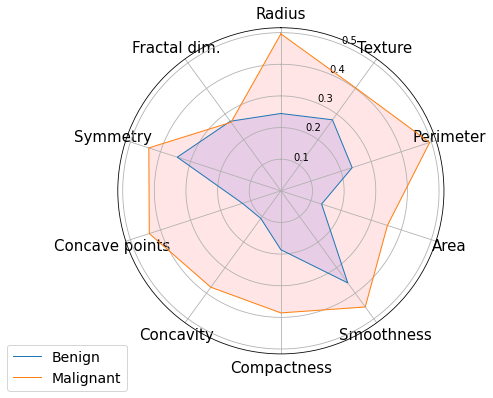

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

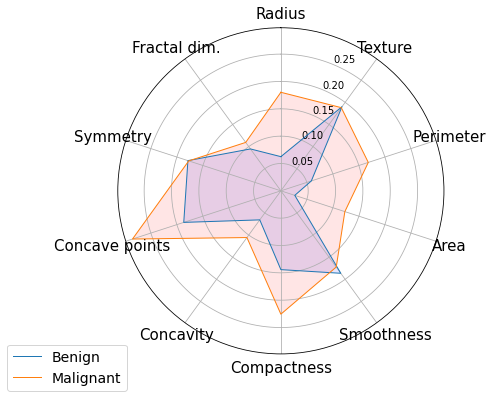

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

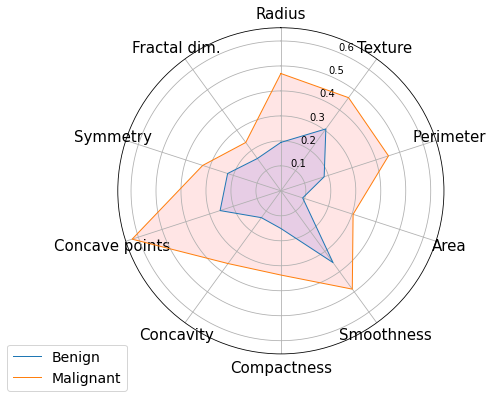

<IPython.core.display.Javascript object>

In [7]:
#@title

# https://python-graph-gallery.com/391-radar-chart-with-several-individuals/


dx_mn = X_mn.max(axis=0) - X_mn.min(axis=0)
dx_se = X_se.max(axis=0) - X_se.min(axis=0)
dx_wt = X_wt.max(axis=0) - X_wt.min(axis=0)

A_B = (( X_mn[y_B] - X_mn.min() )/dx_mn).mean(axis=0)
A_M = (( X_mn[y_M] - X_mn.min() )/dx_mn).mean(axis=0)

B_B = (( X_se[y_B] - X_se.min() )/dx_se).mean(axis=0)
B_M = (( X_se[y_M] - X_se.min() )/dx_se).mean(axis=0)

C_B = (( X_wt[y_B] - X_wt.min() )/dx_wt).mean(axis=0)
C_M = (( X_wt[y_M] - X_wt.min() )/dx_wt).mean(axis=0)

def plot_data(B, M):
    # Using Panda dataframe
    df = pd.DataFrame({
    'Diagnosis': ['Benign', 'Malignant'],
    class_feat[0] : [ B[0] , M[0] ],
    class_feat[1] : [ B[1] , M[1] ],
    class_feat[2] : [ B[2] , M[2] ],
    class_feat[3] : [ B[3] , M[3] ],
    class_feat[4] : [ B[4] , M[4] ],
    class_feat[5] : [ B[5] , M[5] ],
    class_feat[6] : [ B[6] , M[6] ],
    class_feat[7] : [ B[7] , M[7] ],
    class_feat[8] : [ B[8] , M[8] ],
    class_feat[9] : [ B[9] , M[9] ], })

    # General details
    N = len(B)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    values=df.loc[0].drop('Diagnosis').values.flatten().tolist()
    values += values[:1]
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(angles, fontsize=14)
    plt.xticks(angles[:-1], class_feat, fontsize=15)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Benign")
    ax.fill(angles, values, 'b', alpha=0.1)

    values=df.loc[1].drop('Diagnosis').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Malignant")
    ax.fill(angles, values, 'r', alpha=0.1) 
    plt.legend(bbox_to_anchor=(0.05, 0.05), fontsize=14)
    fig = plt.gcf()
    fig.set_size_inches(6, 6)

t = widgets.TabBar(["Mean", "SE", "Worst"])
# ----------------------- Case A ----------------------- #
with t.output_to(0):
    plot_data(A_B, A_M)

# ----------------------- Case B ----------------------- #
with t.output_to(1):
    plot_data(B_B, B_M)

# ----------------------- Case C ----------------------- #
with t.output_to(2):
    plot_data(C_B, C_M)

> $\text{Key takeaways}$ :

**True to all** : 

The highest values at **any** parameter is obtained from the Malignant diagnosis.\
 In addition, the following feature seem to exhibit an almost negligible difference : 
 
$\hspace{1cm} \bullet$ similarity - $d(B,M) \approx 0$ : Fractal dimension. 

\\
**c** $:=$ Worst (mean of 3 largest values) :

Any point of dataset ('c') is greater than any of the original ('a') dataset.\
That is not surprising as dataset ('c') consists of ('a')'s three largest values. 

\\
**b** $:=$ SE $(\frac{\sigma}{\sqrt{n}})$ : 

The differences in the SE comparison are significantly smaller, which imply that the SE group distributes uniformly.\
Nonetheless, it makes sense as both $\ (B/M) \ $ are calculated over a common normalized standard deviation.

\\
**a** $:=$ Mean $(\mu)$ :

This is the main comparison as it manages to exhibit the main dissimilarities between $\ (B/M) \ $ :

$\hspace{1cm} \bullet$ Proximity - $d(B,M) \leq 0.1$ :$\ $ Symmetry, Smoothness

$\hspace{1cm} \bullet$ Dissimilarity - $d(B,M) > 0.1$ : $\ $ Radius, Perimeter, Perimeter, Area, Compactness, Concavity, Concave points



### $ \text{Statistical analysis} $

The following table maps each independent variable onto a row and column in order to explore bivariate relationships\
 between every feature pair. The **lower** triangular presents a raw scatter plot of the joint probability distribution $P_{XY}(x, y)$. \
 The **upper** triangular presents the same, but using smoothed contour lines by kernel density estimation (KDE).\
  The **diagonal** exhibits the marginal distribution of both variables - $P_{X}(x) \, , \, P_{Y}(y)$ .


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

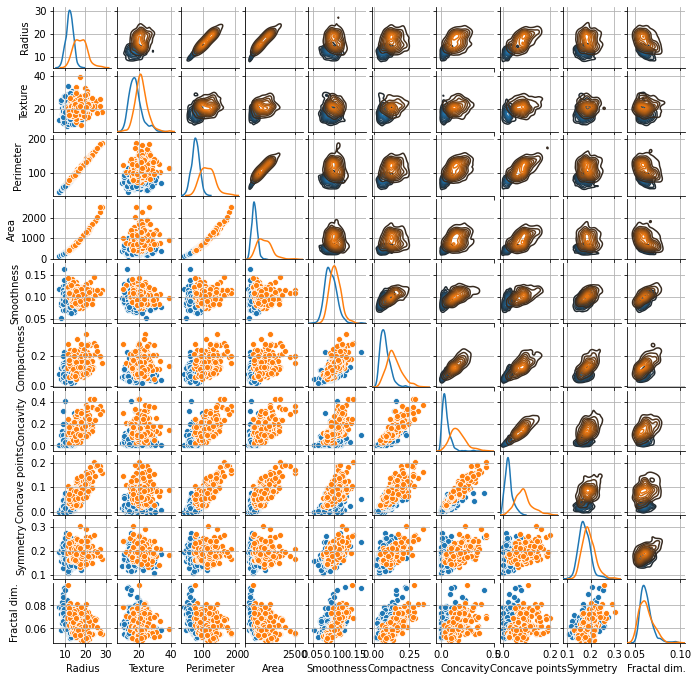

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

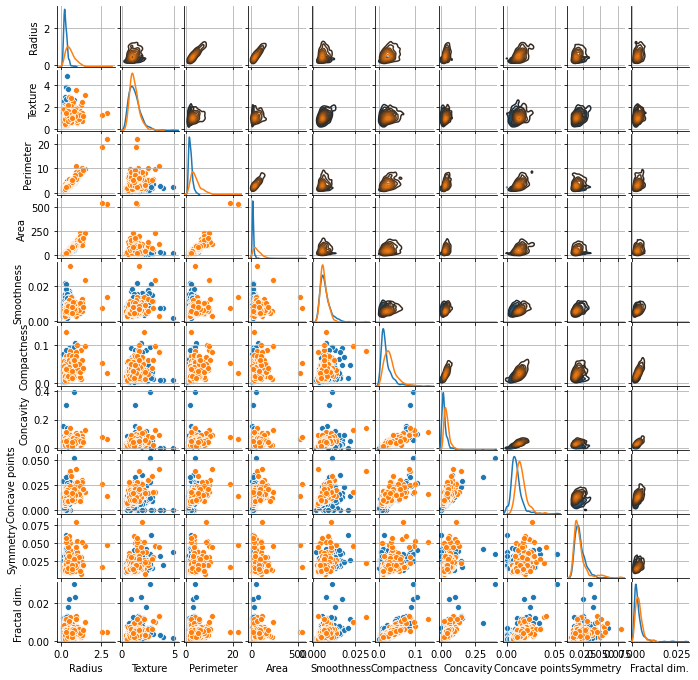

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

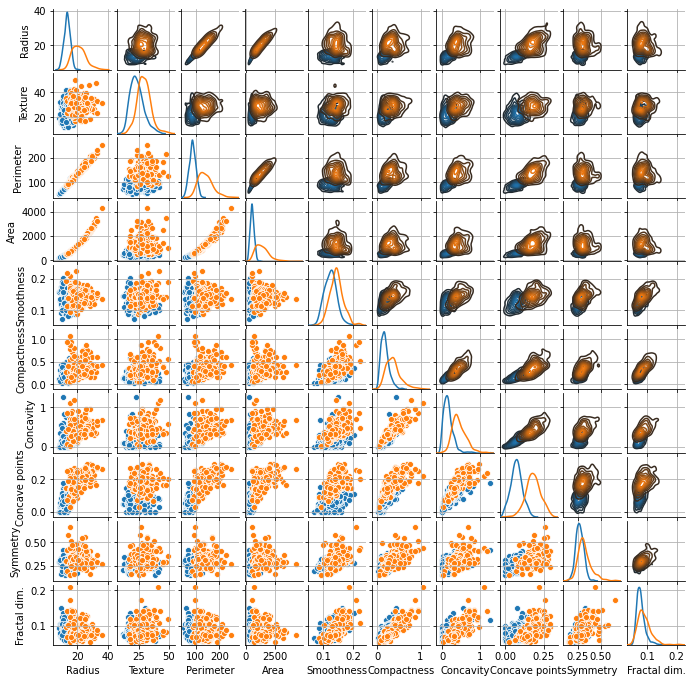

<IPython.core.display.Javascript object>

In [21]:
#@title

# Add diagnosis label to the dataframe
X_mn_y = pd.concat([X_mn, y], axis=1)
X_se_y = pd.concat([X_se, y], axis=1)
X_wt_y = pd.concat([X_wt, y], axis=1)


def PairGrid_func( D ):
    g = sns.PairGrid(D, hue='Diagnosis', diag_sharey=False) # use diagnosis as sub-group criterion
    g.map_lower(sns.scatterplot)
    g.map_upper(sns.kdeplot)
    g.map_diag(sns.kdeplot)
    g.fig.set_size_inches(9, 9)

t = widgets.TabBar(["Mean", "SE", "Worst"]) #, "Worst"])

# Uncomment for executrion; WARNING : takes a long time

# with t.output_to(0):
#     PairGrid_func(X_mn_y)
    
# with t.output_to(1):
#     PairGrid_func(X_se_y)
    
# with t.output_to(2):
#     PairGrid_func(X_wt_y)


This analysis shows not only the $(B/M)$ differences but also the way each feature distributes.\
Smoothness and Fractal dimension distributes similarly, hence helpless in the classification attempt.\
 Contrarily, Concavity and Radius show significant difference.

In order to better understand which features contribute most, an efficient method can be calculating\
 the Pearson correlation coefficients to obtain a correlation matrix. Thereby, the strength of linear\
  relationships are obtained in two aspects [[$1$](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)] :

$+1 :\ $ perfect **positive** linear correlation \
$\hspace{4mm} 0 :\ $ **no** linear correlation \
$-1 :\ $ perfect **negative** linear correlation

$(i) \hspace{2mm} $ **feature vs. feature** - Every pair of two independent variables :

$$ 
\text{corr}(X) = \begin{bmatrix}
1 & \frac{\operatorname{E}[(X_1 - \mu_1)(X_2 - \mu_2)]}{\sigma(X_1)\sigma(X_2)} & \cdots & \frac{\operatorname{E}[(X_1 - \mu_1)(X_n - \mu_n)]}{\sigma(X_1)\sigma(X_n)} \\ \\
 \frac{\operatorname{E}[(X_2 - \mu_2)(X_1 - \mu_1)]}{\sigma(X_2)\sigma(X_1)} & 1 & \cdots & \frac{\operatorname{E}[(X_2 - \mu_2)(X_n - \mu_n)]}{\sigma(X_2)\sigma(X_n)} \\ \\
 \vdots & \vdots & \ddots & \vdots \\ \\
 \frac{\operatorname{E}[(X_n - \mu_n)(X_1 - \mu_1)]}{\sigma(X_n)\sigma(X_1)} & \frac{\operatorname{E}[(X_n - \mu_n)(X_2 - \mu_2)]}{\sigma(X_n)\sigma(X_2)} & \cdots & 1
\end{bmatrix} \hspace{4cm}
$$ \\

Unlike the off-diagonal entries, the principal diagonal denotes the correlation of each random variable with itself $(= 1)$.

$(ii)$ **feature vs. target** - Every pair of independent and target variable (*diagnosis*) :

$$ \rho_{X,Y} = \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y} = \frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X\sigma_Y} \hspace{6cm} $$

The following heatmap presents both calculations but $(ii)$ appears only on the buttom row. \
Note that due to the symmetry, it is suffice to present the lower triangular.

<!-- Ideally, finding a pairwise combination (bivariate relationship) that form a perfect $\ (B/M) \ $ seperation,\
is better than any classifier, leaving the classification task to a simple indicator function :
$$
\mathbf{1}_{M/B}(x) :=
\begin{cases}
1 &\text{if $\ $} x \in M \\
0 &\text{if $\ $} x \notin M
\end{cases}
$$
However, real-world problems tend to be revealed as more complex in a manner that only a well-trained classifier may succeed. -->

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

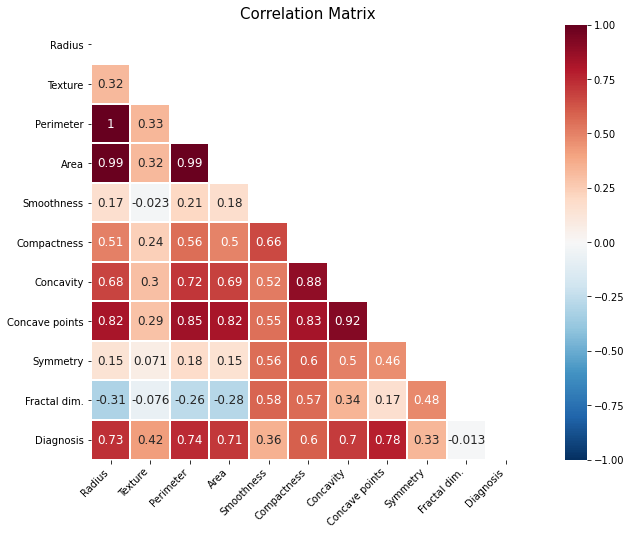

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

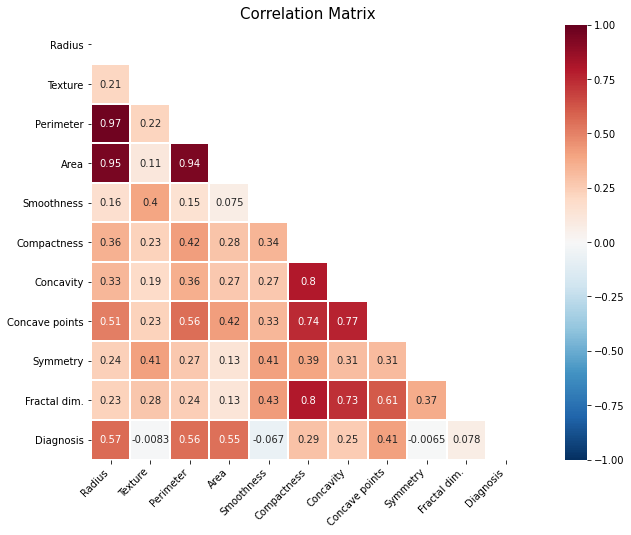

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

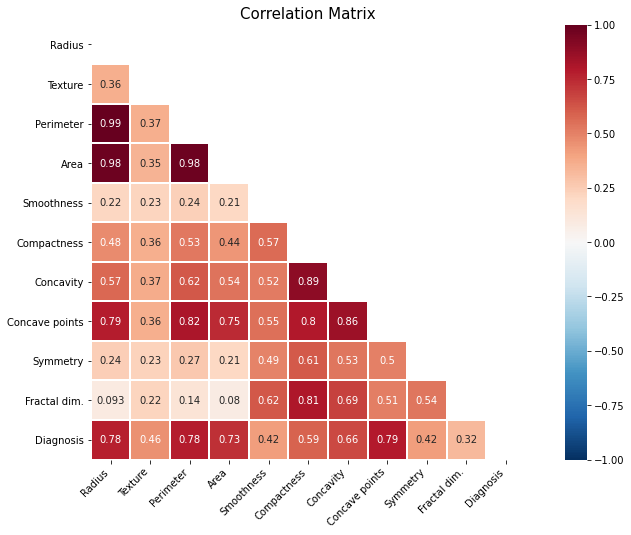

<IPython.core.display.Javascript object>

In [9]:
# @title

t = widgets.TabBar(['Mean', 'SE', 'Worst'])
plt.rcParams['figure.figsize'] = (14, 8)
class_diag =  class_feat + ['Diagnosis']

with t.output_to(0):
    corr_full = X_mn_y.corr(method='pearson')
    mask = np.triu( np.ones_like(corr_full, dtype=np.bool) )
    ax = sns.heatmap(corr_full, cmap='RdBu_r', vmin=-1.0, vmax=1.0, mask=mask, annot=True, square=True, linewidths=1.0, annot_kws={"size": 12}) #, cbar_kws={"shrink": 1.0})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_xticklabels(class_diag)
    ax.set_yticklabels(class_diag)
    plt.title('Correlation Matrix', fontsize = 15)
    plt.show()

with t.output_to(1):
    corr_full = X_se_y.corr(method='pearson')
    mask = np.triu( np.ones_like(corr_full, dtype=np.bool) )
    ax = sns.heatmap(corr_full, cmap='RdBu_r', vmin=-1.0, vmax=1.0, mask=mask, annot=True, square=True, linewidths=1.0, annot_kws={"size": 10}) #, cbar_kws={"shrink": 1.0})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_xticklabels(class_diag)
    ax.set_yticklabels(class_diag)
    plt.title('Correlation Matrix', fontsize = 15)
    plt.show()

with t.output_to(2):
    corr_full = X_wt_y.corr(method='pearson')
    mask = np.triu( np.ones_like(corr_full, dtype=np.bool) )
    ax = sns.heatmap(corr_full, cmap='RdBu_r', vmin=-1.0, vmax=1.0, mask=mask, annot=True, square=True, linewidths=1.0, annot_kws={"size": 10}) #, cbar_kws={"shrink": 1.0})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_xticklabels(class_diag)
    ax.set_yticklabels(class_diag)
    plt.title('Correlation Matrix', fontsize = 15)
    plt.show()


## $ \text{Feature engineering} $

$(i) \, \underline{\text{Rows}} \ 1 : (n-1) : \,$ Based on the linear regression assumptions, the **independent variables** 
 should not be\
 correlated with each other (AKA **Multicollinearity**).
  As can be seen, the Radius ($\, r \,$) and the Perimeter ($\, P\, $) have\
  almost $\, 100 \% \,$ correlation score, apparently since most samples are circular and $\,P = f(r) \,$. Therefore,\
  one of the feature is considered **redundant** and can be removed in order to improve later the model accuracy and reduce overfitting.

$(ii)  \, \underline{n\text{-th Row}} : \,$ Contrarily to $(i)$, here the correlation expresses the feature importance / relevance to the **target**. \
For example, the Radius, Texture, Area, Concavity and Concave points exhibit ($\geq 70 \% $) , while Fractal dimension $(\approx 1 \%)$. 

Using random forest regressor [[$2$](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest%20regressor#sklearn.ensemble.RandomForestRegressor)], the $(ii)$ findings can be validated :



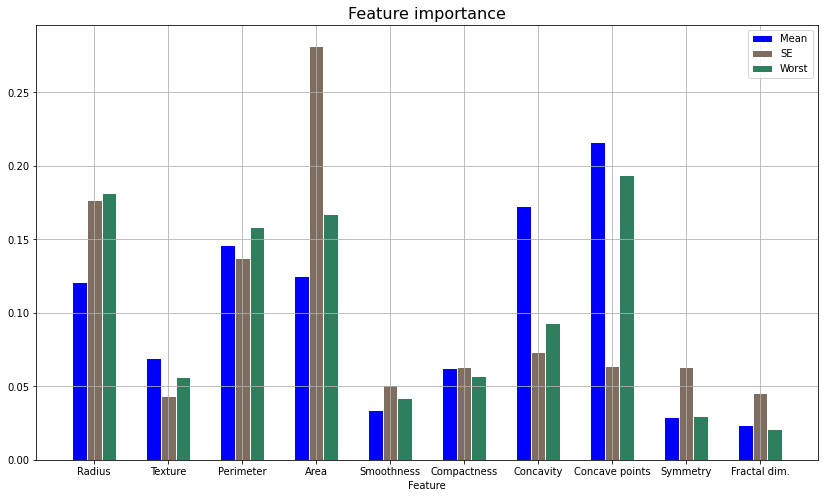

In [10]:
# @title

# ----------- Dataset Normlization ----------- #

def self_Normalize( X ):
    X_n = (X-X.mean())/(X.max(axis=0)-X.min(axis=0))
    return X_n

X_N = self_Normalize( X )
X1, X2, X3 = X_N.iloc[:, ix_mn], X_N.iloc[:, ix_se], X_N.iloc[:, ix_wt]
model_1 = ExtraTreesClassifier(); model_1.fit(X1, y.values.ravel())
model_2 = ExtraTreesClassifier(); model_2.fit(X2, y.values.ravel())
model_3 = ExtraTreesClassifier(); model_3.fit(X3, y.values.ravel())

bars1 = pd.Series(model_1.feature_importances_, index=X1.columns)
bars2 = pd.Series(model_2.feature_importances_, index=X2.columns)
bars3 = pd.Series(model_3.feature_importances_, index=X3.columns)

barWidth = 0.2
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#7f6d5f', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.title('Feature importance', fontsize = 16)
plt.xlabel('Feature')
plt.xticks([r + barWidth for r in range(len(class_feat))], [r for r in class_feat])
plt.rcParams['figure.figsize'] = (15, 6)
plt.legend(['Mean', 'SE', 'Worst'])
plt.show()


Across three cases, same features seem to exhibit similar behavior, in a manner that coincides with each correlation matrix.

However, in order to extract maximum relevance from entire $X$, the correlation matrix should be applied on all 30 features :

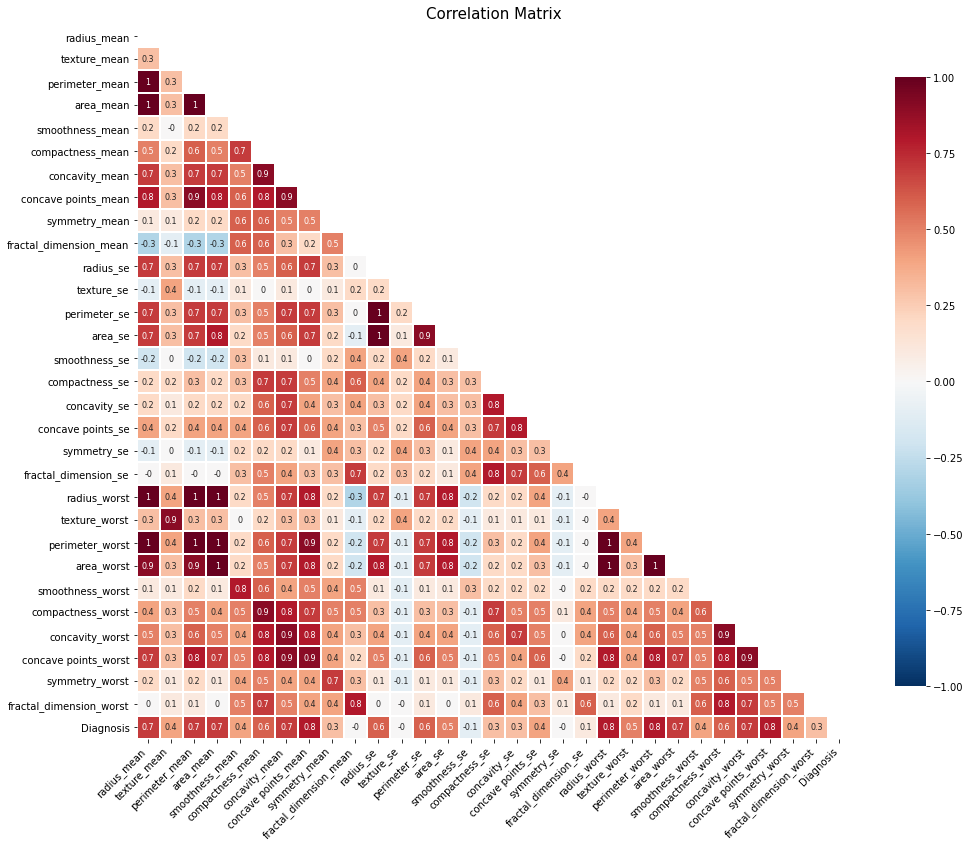

In [11]:
# @title

X_all_y = pd.concat([X, y], axis=1)

corr_full = X_all_y.corr(method='pearson')
corr_full = corr_full.round(1)
mask = np.triu( np.ones_like(corr_full, dtype=np.bool) )
ax = sns.heatmap(corr_full, cmap='RdBu_r', vmin=-1.0, vmax=1.0, mask=mask, annot=True, square=True, linewidths=1.0, annot_kws={"size": 8}, cbar_kws={"shrink": 0.7})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Correlation Matrix', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(16, 16)
plt.show()


Similarly to before, the feature importance will be examined now the most important features on the entire dataset :

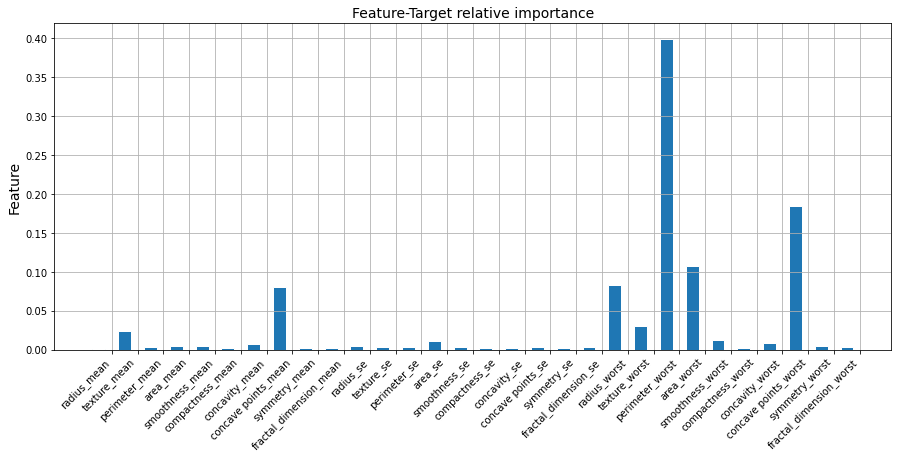

In [12]:
# @title

X_NN = X_N

model_full = RandomForestRegressor(); model_full.fit(X_NN, y.values.ravel())
vec_importance = model_full.feature_importances_

barWidth = 0.5
bars = pd.Series(vec_importance, index=X_NN.columns)
r = np.arange(len(bars))
plt.bar(r, bars, width=barWidth, edgecolor='white', label='var1')
plt.xticks(rotation=45, ha="right")
 
# Add xticks on the middle of the group bars
plt.title('Feature-Target relative importance', fontsize = 14)
plt.xticks([r + barWidth for r in range(len(X.columns))], [r for r in X.columns], fontsize=10, weight=None)
plt.ylabel('Feature', fontsize = 14)
plt.rcParams['figure.figsize'] = (12, 3)
plt.show()


#### $ \text{Feature elimination} $
Out of 30 features, many of them seem to be redundant. As seen before, the Concave points and the perimeter contribute\
 by far more than any other feature. Note that five features manage to contribute up to $80 \%$ of the importance.\
 Using recursive feature elimination (RFE), the features are sorted such that high-ranked (informative) features **increase**\
 the model accuracy (**---** line). But contrastingly, further addition of low-ranked features do not contribute any improvement :

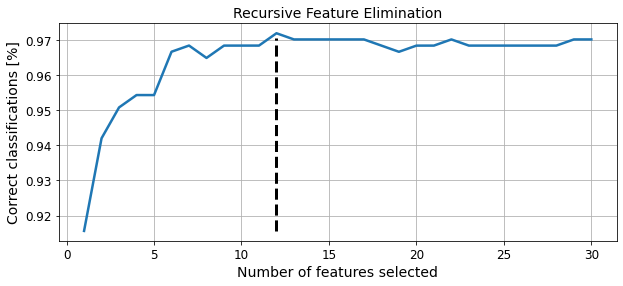

In [13]:
# @title

# NOTE :: in case this section is STUCK :
# Factory reset runtime >> Restart and run all

svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')

# Xt = self_Normalize( X )
rfecv.fit( self_Normalize( X ), y.values.ravel() )
feat_opt = rfecv.n_features_

plt.figure(figsize=(10, 4))
plt.xlabel("Number of features selected", fontsize = 14)
plt.xticks(fontsize=12)
plt.ylabel("Correct classifications [%]", fontsize = 14)
plt.yticks(fontsize=12)
plt.title("Recursive Feature Elimination", fontsize = 14)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, lw=2.5, linestyle='-')

y_0, y_max = np.min(rfecv.grid_scores_), np.max(rfecv.grid_scores_)
y_rfe = np.arange(y_0, y_max, 0.0025)
x_rfe = feat_opt*np.ones(len(y_rfe))
plt.plot(x_rfe, y_rfe, c='black', lw=3, linestyle='--')
plt.show()

# Get N highest numbers' indices 
ix_imp = sorted(range(len(vec_importance)), key = lambda sub: vec_importance[sub])[-feat_opt:] 


#### $\text{Principal component analysis (PCA)}$

PCA is a practical step in dimensionality reduction, by projecting the data from a high-dimensional space onto\
 a lower one. The transformation reveals the internal structure that explains most (maximizes) the data variance :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

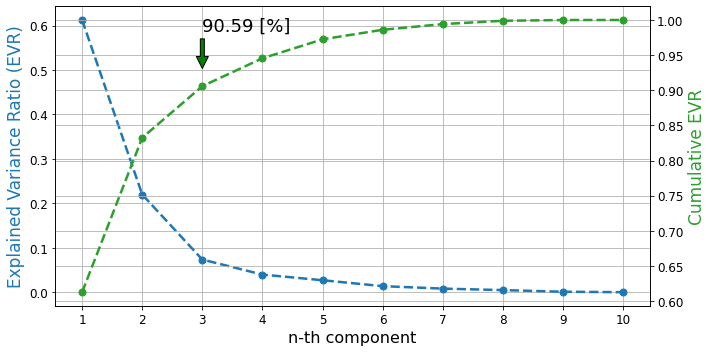

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

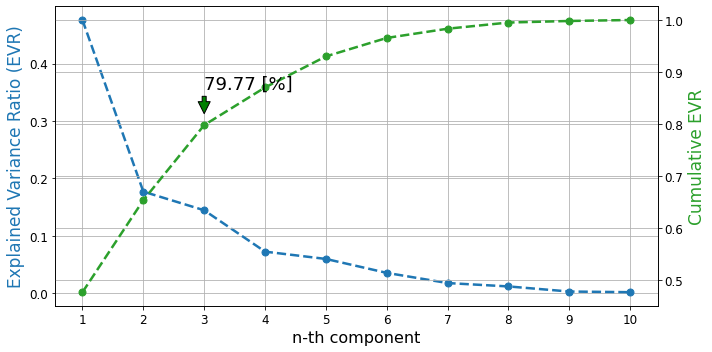

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

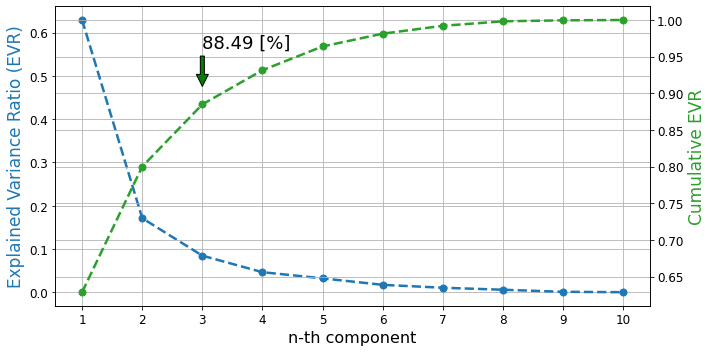

<IPython.core.display.Javascript object>

In [14]:
# @title

plt.rcParams['figure.figsize'] = (10, 5)
class_full =  class_feat + ['Diagnosis']

X_train_N = X_N

# Initialize the PCA method
pca_all, pca_mn, pca_se, pca_wt = PCA(), PCA(), PCA(), PCA()

# All Datasets
pca_all.fit(X_train_N)
pca_exp_all = pca_all.explained_variance_ratio_

# Mean Dataset
pca_mn.fit(X_train_N.iloc[:, ix_mn])
pca_exp_mn = pca_mn.explained_variance_ratio_

# SE Dataset
pca_se.fit(X_train_N.iloc[:, ix_se])
pca_exp_se = pca_se.explained_variance_ratio_

# Worst Dataset
pca_wt.fit(X_train_N.iloc[:, ix_wt])
pca_exp_wt = pca_wt.explained_variance_ratio_

t_all  = [*range(1, D.shape[1]-1)]
t_solo = [*range(1, X_mn.shape[1]+1)]
Wgt = widgets.TabBar(['Mean', 'SE', 'Worst'])

def PCA_plot(t, pca_exp):
    # ---------------------------------------------- #
    # Instantiate the prinicipal (LHS) plot
    pca_cum = np.cumsum(pca_exp)
    fig, ax1 = plt.subplots()
    color = 'tab:blue'

    ax1.set_xlabel('n-th component', fontsize=16)
    ax1.set_ylabel('Explained Variance Ratio (EVR)', color=color, fontsize=17)
    ax1.plot(t, pca_exp, 'bo', color=color, markersize=7)
    ax1.plot(t, pca_exp, '--', color=color, linewidth=2.5)
    ax1.tick_params(axis="x", labelsize=12)
    ax1.tick_params(axis="y", labelsize=12)

    # ---------------------------------------------- #
    # Instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx()  
    color = 'tab:green'

    ax2.set_ylabel('Cumulative EVR', color=color, fontsize=17)  # we already handled the x-label with ax1
    ax2.plot(t, pca_cum, 'go', color=color, markersize=7)
    ax2.plot(t, pca_cum, '--', color=color, linewidth=2.5)
    ax2.tick_params(axis="y", labelsize=12)
    t_score, t_loc = pca_cum[2], pca_cum[2]*1.025
    ax2.annotate('%.2f '%(t_score*100)+'[%]', fontsize=18, xy =(3, t_loc), xytext =(3, t_loc*1.06), arrowprops = dict(facecolor ='green', shrink = 0.05),) 

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.xticks(t)
    plt.show()


with Wgt.output_to(0):
    PCA_plot(t_solo, pca_exp_mn)

with Wgt.output_to(1):
    PCA_plot(t_solo, pca_exp_se)

with Wgt.output_to(2):
    PCA_plot(t_solo, pca_exp_wt)

# with Wgt.output_to(3):
#     PCA_plot(t_all,  pca_exp_all)


The figure above presents PCA on case (**a**) ( $X^{(a)}_{\text{Mean}} \in \mathbb{R}^{n \times 10}$ ). From left is the PCA's ability\
 to capture proportional variance (EVR), and from right is the cumulative sum.

Let $\, \mathbf{W} \in \mathbb{R}^{10\times10} \, $ be a weights matrix whose columns are the eigenvectors of $X^T X$.\
 By choosing $\mathbf{W}$'s top 3 eigenvectors, the observations can be projected onto a **3D** space :


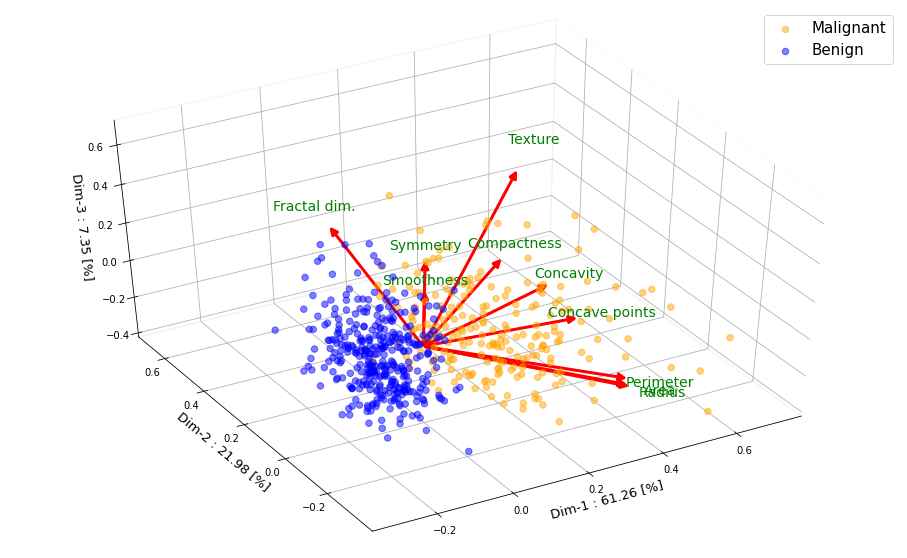

In [15]:
# @title

# **************************************************************** #
# ------------------------ 3D PCA scatter ------------------------ #
# **************************************************************** #

from sklearn.preprocessing import StandardScaler
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import pdb


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


def PCA_scatter_3D(X_pca, max_Var, y, labels):
    
    y_M, y_B = y==1, y==0           # Logical statement for Benign indication
    xs, ys, zs = X_pca[:,0], X_pca[:,1], X_pca[:,2]
    s_x, s_y, s_z = 1.0/(xs.max() - xs.min()), 1.0/(ys.max() - ys.min()), 1.0/(zs.max() - zs.min())
    
    # ---------- Scatter color by class ----------- #
    # pdb.set_trace()
    ax.scatter(xs[y_M]*s_x, ys[y_M]*s_y, zs[y_M]*s_z, s=42, c='orange', alpha=0.5) 
    ax.scatter(xs[y_B]*s_x, ys[y_B]*s_y, zs[y_B]*s_z, s=42, c='blue',   alpha=0.5)
    n = max_Var.shape[0]

    for i in range(n):
        mean_x, mean_y, mean_z = max_Var[i,0], max_Var[i,1], max_Var[i,2]
        a = Arrow3D([mean_x, 0.0], [mean_y, 0.0], [mean_z, 0.0], mutation_scale=15, lw=3, arrowstyle="<|-", color="r")
        ax.add_artist(a)

        if labels is None:
            ax.text(max_Var[i,0]* 1.15, max_Var[i,1] * 1.15, max_Var[i,2] * 1.15, "Var"+str(i+1), color = 'g', fontsize=14, ha = 'center', va = 'center')
        else:
            ax.text(max_Var[i,0]* 1.15, max_Var[i,1] * 1.15, max_Var[i,2] * 1.15, labels[i],      color = 'g', fontsize=14, ha = 'center', va = 'center')


def PCA_reduction(X, PC_num):
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    pca = PCA()         # Perform PCA transformation
    X_pca = pca.fit_transform(X)[:, 0:PC_num]             # Low dim : Projected  instances
    max_Var = np.transpose(pca.components_[0:PC_num, :])  # Direction of maximum variance
    return X_pca, max_Var


# ----------------- Visualization ----------------- #
PC_num = 3          # Dimensionallity reduction to 3D
plt.rcParams['figure.figsize'] = (8, 5)
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
X_pca, max_Var = PCA_reduction(X_mn, PC_num)            #
PCA_scatter_3D(X_pca, max_Var, y['Diagnosis'], class_feat)   # Call PCA function

ax.legend(['Malignant', 'Benign'], fontsize=15, loc='best')
pc_1, pc_2, pc_3 = pca_exp_mn[0]*100, pca_exp_mn[1]*100, pca_exp_mn[2]*100
ax.set_xlabel('Dim-1 : %.2f [%%]'%pc_1, fontsize=13)
ax.set_ylabel('Dim-2 : %.2f [%%]'%pc_2, fontsize=13)
ax.set_zlabel('Dim-3 : %.2f [%%]'%pc_3, fontsize=13)
ax.xaxis.pane.fill, ax.yaxis.pane.fill, ax.zaxis.pane.fill = False, False, False
ax.view_init(elev=45, azim=-120) # PC1 || PC2
plt.show()


# **************************************************************** #
# ------------------------ 2D PCA scatter ------------------------ #
# **************************************************************** #

# from sklearn.preprocessing import StandardScaler

# # In general, it's a good idea to scale the data prior to PCA.
# scaler = StandardScaler()
# # xx = x_train_N.iloc[:, 2:]
# xt = x_train_N.iloc[:, ix_mn]
# scaler.fit(xt)
# xt = scaler.transform(xt)
# pca = PCA()
# x_new = pca.fit_transform(xt)

# def PCA_scatter(X, coeff, y_M, labels):
    
#     n = coeff.shape[0]
#     xs, ys = X[:,0], X[:,1]             # zs = X[:,2]
#     scalex, scaley = 1.0/(xs.max() - xs.min()) , 1.0/(ys.max() - ys.min())
#     # scalez = 1.0/(zs.max() - zs.min()) <-- 3D of Z
    
#     # ---------- Scatter color by class ----------- #
#     plt.scatter(xs[y_M] * scalex, ys[y_M] * scaley, c = 'orange', alpha=0.5) 
#     plt.scatter(xs[1-y_M==True] * scalex, ys[1-y_M==True] * scaley, c = 'blue', alpha=0.5)
#     # plt.scatter(xs * scalex, ys * scaley, c = 'blue')

#     for i in range(n):
#         plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r',alpha = 0.5)
#         if labels is None:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
#         else:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', fontsize=12, ha = 'center', va = 'center')
    
#     plt.xlabel("PC{}".format(1))
#     plt.ylabel("PC{}".format(2))
#     plt.grid(linestyle='-', linewidth=0.5)

# #Call the function. Use only the 2 PCs
# y_M, y_B = y_train, 1-y_train
# label_diag = pd.DataFrame(columns=['M', 'B'])
# label_diag['M'], label_diag['B'] = y_train, 1-y_train
# y_M = label_diag.iloc[:, 0]==True

# pca_i = 2
# # pca_exp = pca.explained_variance_ratio_
# PCA_scatter(x_new[:, 0:pca_i], np.transpose(pca.components_[0:pca_i, :]), y_M, class_feat)
# # plt.xlabel('Dim-1 : %.2f [%%]'%pca_exp[0], fontsize=12)
# # plt.ylabel('Dim-2 : %.2f [%%]'%pca_exp[1], fontsize=12)
# plt.rcParams['figure.figsize'] = (10, 6)
# plt.show()


### $ \text{Biplot} $

Each variable (feature) that went into PCA has an associated red <font color='red'> **arrow** </font> (after scaling factor),\
 in the directions that maximize each of the principal component's variance. 
Here, the Concave points\
 feature (strong correlation), maximizes the **1st PC**. Contrarily, Fractal dimension and Symmetry (weak \
 correlation), contribute poorly to the **3rd PC**. Therefore, the **full** feature space will undergo :
 
$$ 
X_0 \in \mathbb{R}^{n \times 30} \quad \underset{\text{Feature selection}}{\Rightarrow} \quad X_1 \in \mathbb{R}^{n \times d_{sel}} \quad \underset{\text{Dim. compression}}{\Rightarrow} \quad X_2 \in \mathbb{R}^{n \times 3}
$$

Such that all that is left to do, is to train a prediction function $\, f : X_2 \rightarrow Y \,$ that will be able to classify\
 the compressed data correctly, in terms of selected metrics.

## $\text{Modelling}$

The learning procedure defines a model which associates the correct label for each input sample - $\, y_i = f(x_i) \,$.\
 The performance metric on the output space denotes the cost of wrong labeling.

### $\text{Metrics}$

An evaluation metric is a function that measures a classifier's performance, thus allows comparison between\
 several models. From left is a confusion matrix, which defines different combinations for each indication : 
 
<center><img src= https://github.com/Daniboy370/Machine-Learning/blob/master/Misc/Latex/Images/Mat_conf.png?raw=true  width="630px" /></center>

$\hspace{11.5cm}$ ( **T** - True, **F** - False, **P** - Positive, **N** - Negative )

Combining the metrics improves understanding of the big picture, and enables to overcome data imbalance.\
 Optimality is obtained by minimizing false indications (**FP, FN**)

### $\text{Classifiers}$
The following list of classifiers was utilized in search of an optimal candidate : 

$\quad$ | $\text{ML Algorithm}$ | $\quad$
---        |         ---          |     ---
$\text{AdaBoost} \quad$ | $\text{Gaussian Naive Bayes } \ $| $\text{KNN}$
$\text{Decision Trees}$ | $\text{Gradient Boosting }$      | $\text{SVM}$
$\text{Extra Trees }$   | $\text{Logistic Regressio }$     | $\text{Random Forest}$


#### $\text{ROC-AUC}$

An **ROC** reflects a binary classifier ability to discriminate classes, using a probabilistic analysis.\
 Each threshold is point on the **ROC** graph, denoting the TPR/FPR tradeoff. \
 * What would happen if we took features that scored poorly in the correlation matrix ? 

<center><img src= https://github.com/Daniboy370/Machine-Learning/blob/master/Misc/Latex/Images/ROC_bad.png?raw=true  width="575px" /></center>

Features with low-ranked contribution to the explained variable perform poorly, slightly above a random decision \
 / ”No skill” (**AUC**=0.5). The AUC is the area under the ROC,
which expresses the prediction success rate from 0-1.

Ideally, the perfect classification will exhibit a $ \Gamma$-shape that crosses the (0, 1) point in the FPR-TPR plane. \
 Meaning that there exists a threshold with $100 \%$ correct indications.

## $\text{Results}$

Let us start off with the binary classification restults :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Model Accuracy ---
Training : 100.00 [%] 
Test :     95.61 [%]



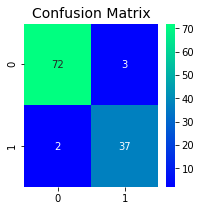

              precision    recall  f1-score   support

           0     0.9730    0.9600    0.9664        75
           1     0.9250    0.9487    0.9367        39

    accuracy                         0.9561       114
   macro avg     0.9490    0.9544    0.9516       114
weighted avg     0.9566    0.9561    0.9563       114



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Model Accuracy ---
Training : 100.00 [%] 
Test :     94.74 [%]



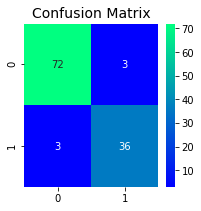

              precision    recall  f1-score   support

           0     0.9600    0.9600    0.9600        75
           1     0.9231    0.9231    0.9231        39

    accuracy                         0.9474       114
   macro avg     0.9415    0.9415    0.9415       114
weighted avg     0.9474    0.9474    0.9474       114



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Model Accuracy ---
Training : 100.00 [%] 
Test :     92.98 [%]



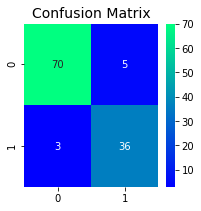

              precision    recall  f1-score   support

           0     0.9589    0.9333    0.9459        75
           1     0.8780    0.9231    0.9000        39

    accuracy                         0.9298       114
   macro avg     0.9185    0.9282    0.9230       114
weighted avg     0.9312    0.9298    0.9302       114



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Model Accuracy ---
Training : 96.04 [%] 
Test :     93.86 [%]



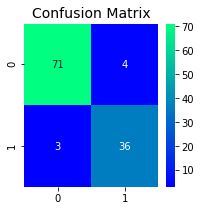

              precision    recall  f1-score   support

           0     0.9595    0.9467    0.9530        75
           1     0.9000    0.9231    0.9114        39

    accuracy                         0.9386       114
   macro avg     0.9297    0.9349    0.9322       114
weighted avg     0.9391    0.9386    0.9388       114



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Model Accuracy ---
Training : 100.00 [%] 
Test :     94.74 [%]



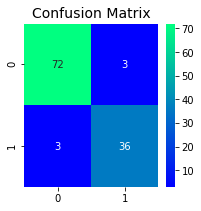

              precision    recall  f1-score   support

           0     0.9600    0.9600    0.9600        75
           1     0.9231    0.9231    0.9231        39

    accuracy                         0.9474       114
   macro avg     0.9415    0.9415    0.9415       114
weighted avg     0.9474    0.9474    0.9474       114



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Model Accuracy ---
Training : 97.36 [%] 
Test :     94.74 [%]



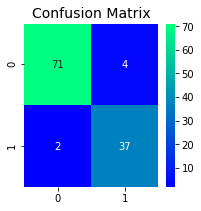

              precision    recall  f1-score   support

           0     0.9726    0.9467    0.9595        75
           1     0.9024    0.9487    0.9250        39

    accuracy                         0.9474       114
   macro avg     0.9375    0.9477    0.9422       114
weighted avg     0.9486    0.9474    0.9477       114



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Model Accuracy ---
Training : 93.19 [%] 
Test :     94.74 [%]



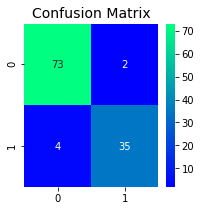

              precision    recall  f1-score   support

           0     0.9481    0.9733    0.9605        75
           1     0.9459    0.8974    0.9211        39

    accuracy                         0.9474       114
   macro avg     0.9470    0.9354    0.9408       114
weighted avg     0.9473    0.9474    0.9470       114



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Model Accuracy ---
Training : 100.00 [%] 
Test :     94.74 [%]



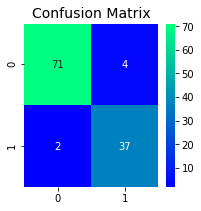

              precision    recall  f1-score   support

           0     0.9726    0.9467    0.9595        75
           1     0.9024    0.9487    0.9250        39

    accuracy                         0.9474       114
   macro avg     0.9375    0.9477    0.9422       114
weighted avg     0.9486    0.9474    0.9477       114



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Model Accuracy ---
Training : 97.58 [%] 
Test :     95.61 [%]



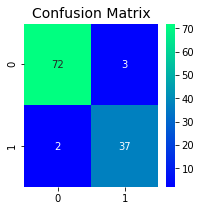

              precision    recall  f1-score   support

           0     0.9730    0.9600    0.9664        75
           1     0.9250    0.9487    0.9367        39

    accuracy                         0.9561       114
   macro avg     0.9490    0.9544    0.9516       114
weighted avg     0.9566    0.9561    0.9563       114



<IPython.core.display.Javascript object>

In [16]:
# @title
# **************************************************************** #
# ----------------- Import Classification Tools ------------------ #
# **************************************************************** #

# Feature Extraction to k-dim (k < 30)
X_reduced = X.iloc[:, ix_imp]
# Feature Compression to 3-dim
x_pca, _ = PCA_reduction(X_reduced, PC_num=3)

if not isinstance(x_pca, pd.DataFrame):
    x_pca = pd.DataFrame(x_pca, index=y.index) # Note that indices should be coherent
X_pca = self_Normalize(x_pca)

XX_tr, yy_tr = X_pca.loc[ix_train], y.loc[ix_train]['Diagnosis'].values
XX_ts, yy_ts = X_pca.loc[ix_test],  y.loc[ix_test]['Diagnosis'].values

# **************************************************************** #
# ---------------- Comparison Between Classifiers ---------------- #
# **************************************************************** #

def Classification(model, X_train, y_train, X_test, y_test):
    random_state = np.random.RandomState(0)
    model.fit(X_train, y_train)   

    # Calculating the accuracies
    print('--- Model Accuracy ---')
    score_train, score_test = model.score(X_train, y_train)*100, model.score(X_test, y_test)*100
    print('Training : %.2f [%%] \nTest :     %.2f [%%]\n'%(score_train, score_test))
    
    # Predicting on Test-set
    y_pred = model.predict(X_test)

    # confusion matrix 
    cm = confusion_matrix(y_test, y_pred)
    plt.rcParams['figure.figsize'] = (3, 3)
    sns.heatmap(cm, annot = True, cmap = 'winter')
    plt.title('Confusion Matrix', fontsize = 14)
    plt.show()

    # classification report
    cr = classification_report(y_test, y_pred, digits=4)
    print(cr)

    clf_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    clf_probs = clf_probs[:, 1]
    # calculate scores
    clf_auc = roc_auc_score(y_test, clf_probs)
    # calculate roc curves
    fpr, tpr, _ = roc_curve(y_test, clf_probs)

    return cr, fpr, tpr, clf_auc


# -------------- List of Classifier -------------- #
Clf_dict = dict()               # Create a dicitionary of several classifiers 
Clf_dict[0] = AdaBoostClassifier(n_estimators=100, random_state=0)
Clf_dict[1] = DecisionTreeClassifier(random_state=0)
Clf_dict[2] = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
Clf_dict[3] = GaussianNB()
Clf_dict[4] = GradientBoostingClassifier(random_state=0)
Clf_dict[5] = KNeighborsClassifier()
Clf_dict[6] = LogisticRegression()
Clf_dict[7] = RandomForestClassifier(n_estimators=30, max_depth=None, min_samples_split=2, random_state=0)
Clf_dict[8] = svm.SVC(probability=True)
c_report, fpr, tpr, auc = dict(), dict(), dict(), dict()

clf_names = ['Adaboost', 'Decision \nTree', 'Extra Tree', 'Gaussian \nNaive Bayes', 'Gradient \nBoosting',
                      'KNN', 'Logistic \nRegression', 'Random \nForest', 'SVM']
Wgt = widgets.TabBar(clf_names)

for i in range(len(Clf_dict)):
    with Wgt.output_to(i):
        clf = Clf_dict[i]
        c_report[i], fpr[i], tpr[i], auc[i] = Classification(clf, XX_tr, yy_tr, XX_ts, yy_ts)


Concentrate it in one table for comparative analysis :

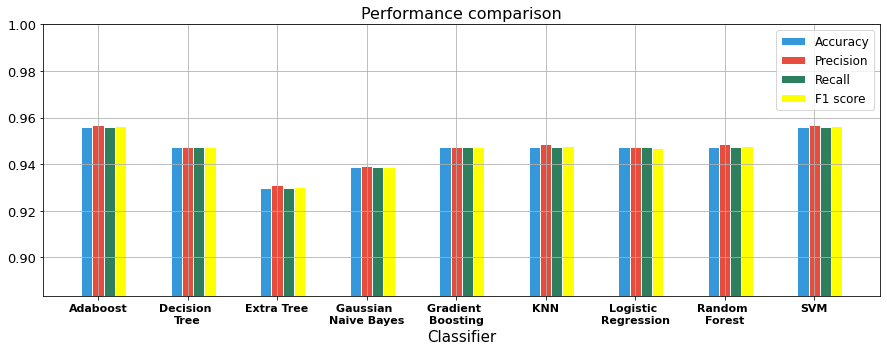

In [17]:
# @title

def extract_values( Str ): 
    # ---------- Extract meterics from string ---------- #
    get_acc = Str.split('accuracy')[1].split('\n')[0]
    Acc = float(get_acc.strip()[0:6])           # Remove irrelevant chars

    get_line = Str.split('weighted avg')[1].split('\n')[0]
    get_line = get_line.replace(" ", "")        # remove irrelevant chars

    Pr = float(get_line[0:6])
    Rc = float(get_line[6:12])
    F1 = float(get_line[12:18])
    return [Acc, Pr, Rc, F1]


len_X = len(Clf_dict)
Acc, Pr, Rc, F1 = np.zeros(len_X), np.zeros(len_X), np.zeros(len_X), np.zeros(len_X)


for i in range(len_X):
    Acc[i], Pr[i], Rc[i], F1[i] = np.asarray( extract_values( c_report[i] ) )
    

barWidth = 0.125
r1 = np.arange(len_X)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.rcParams['figure.figsize'] = (15, 5)
plt.bar(r1, Acc, color='#3498db', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, Pr,  color='#e74c3c', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r3, Rc,  color='#2d7f5e', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r4, F1,  color='yellow', width=barWidth, edgecolor='white', label='F1 score')
 
# Add xticks on the middle of the group bars
plt.title('Performance comparison', fontsize = 16)
plt.xlabel('Classifier', fontsize=15)
plt.xticks([r + barWidth for r in range(len(clf_names))], [r for r in clf_names], fontsize=11, weight='bold')
plt.yticks(fontsize=13)

min_value = np.concatenate( (Acc, Pr, Rc, F1) ).min()
plt.ylim([0.95*min_value, 1.0]) 
plt.rcParams['figure.figsize'] = (18, 4)
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1 score'], fontsize=12, loc='best')
plt.show()


And by using FPR-TPR values, compare the obtained **AUC-ROC** :

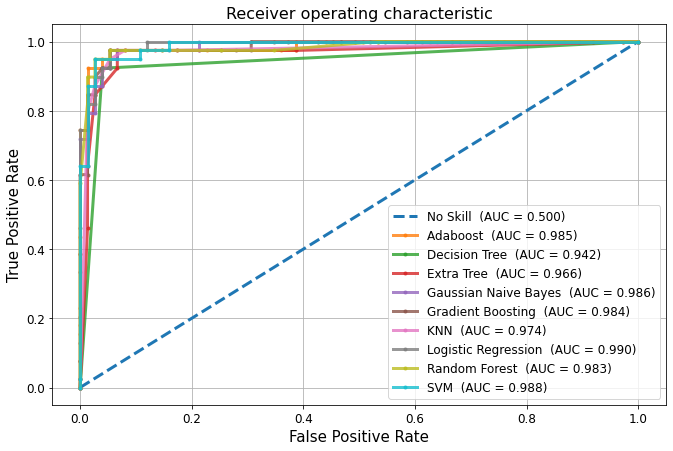

In [18]:
# @title

# No skill classifier (random choice)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

plt.rcParams['figure.figsize'] = (11, 7)
plt.plot(ns_fpr, ns_tpr, lw=3, linestyle='--', label='No Skill')
clf_names = [item.replace('\n', '') for item in clf_names] # Remove down-line

Legend = []
Legend.append('No Skill  (AUC = 0.500)')
for i in range(len(c_report)):
    plt.plot(fpr[i], tpr[i], lw=3, alpha=.8, marker='.')
    Legend.append(clf_names[i]+'  (AUC = '+'%.3f' % auc[i]+')')

plt.title('Receiver operating characteristic', fontsize = 16)
plt.legend(Legend, loc='best', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('True Positive Rate', fontsize=15)
plt.yticks(fontsize=12)
plt.show()


It can be seen, that all of the classifiers succeeded well on the discrimination task.

### $\text{Bonus : Decision boundary}$

Consider an additional PCA, this time after projecting the full data to a 2D plane. Using the amazing [[mlxtend](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/)] library, \
the decision boundary obtained by each one of the classifiers, can be demonstrated as :  : 


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

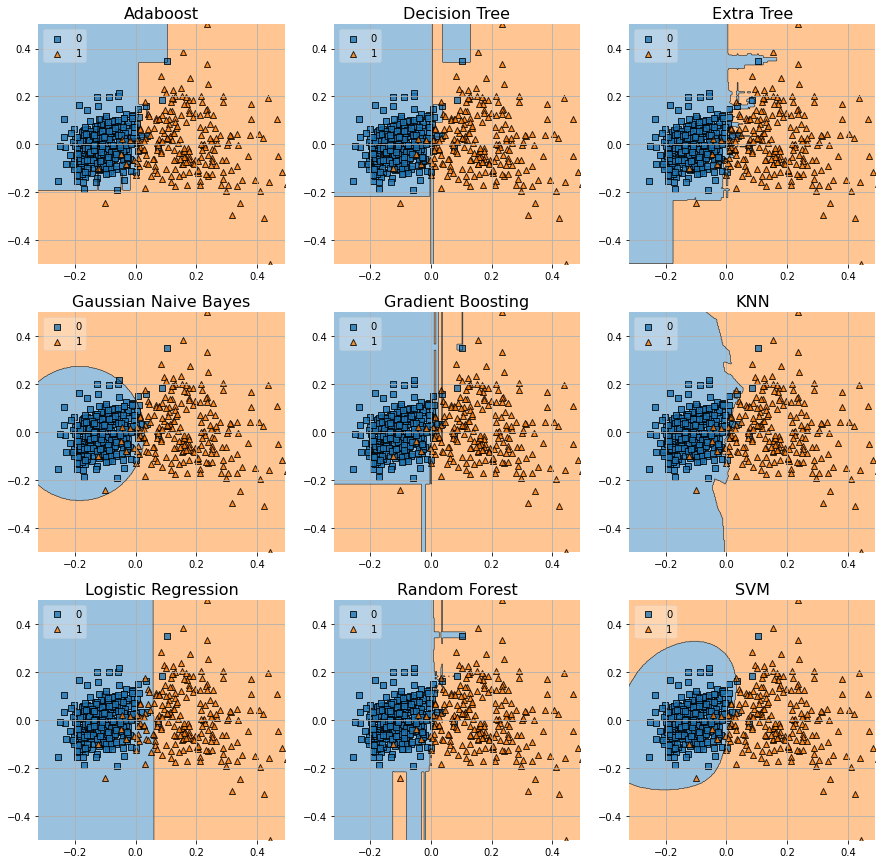

In [19]:
# @title

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

# Loading some example data
x_pca, _ = PCA_reduction(X_reduced, PC_num=2)
X_pca = self_Normalize(x_pca)

px0, px1 = 1.25, 0.66
gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(15, 15))
x_min, x_max, y_min, y_max = X_pca[:, 0].min(), X_pca[:, 0].max(), X_pca[:, 1].min(), X_pca[:, 1].max()

CLF = [Clf_dict[i] for i in range(9)]
yy = y.values.ravel()

for clf, lab, grd in zip(CLF, clf_names, itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X_pca, yy)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_pca, y=yy, clf=clf, legend=2)
    plt.xlim([x_min*px0, x_max*px1])
    plt.ylim([y_min, y_max]) 
    plt.title(lab, fontsize=16)

plt.show()


It is defenitely interesting to see how different decision boundaries are obtained by different classifiers.

## $\text{Discussion}$
In this project I examined the use of several classification techniques for breast cancer diagnosis,\
 after reducing the raw data to a lower representation form. All ML algorithms exhibited high performance\
  on the binary classification, as measured by the chosen metrics.


### $\text{Limitation of the study}$

**Prior engineering** : The dataset as it is publicly available, is already after analysis with specific features, chosen by the researchers. Thereby, the user has no access to the raw image scans at full dimensionality. Thus leaving fewer options for action.


**Low-dimensional representation** : The process of extraction (by correlation), and then projection (by PCA), ends up with 10 times smaller feature space. Both operations rely on existence of linear relationships between the features. This hidden presumption may not always be true, and it might ignore important features that simply fail to score well.

**Dataset aspect** : The dataset contains a modest amount of samples, distributed at an imbalanced $(B/M)$ ratio of $1.684$. During training, most classifiers reached an accuracy of $100 \%$ (unlike test results), probably due to overfitting. However, rebalance technique that involved up-sampling of the malignant class, did not show any dramatic improvement.

In [20]:
# @title

%%html
<link rel="stylesheet" href="../css/style.css"> <!--Setting styles - You can simply ignore this line-->
<marquee style='width: 30%; color: blue;'><b> Finita la Commedia ! </b></marquee>
<marquee style='width: 30%; color: orange;'><b> Finita la Commedia ! </b></marquee>